<a href="https://colab.research.google.com/github/BERTPSYO/BERTPSYO.github.io/blob/master/projects/Data_Sciences/Retail_Salespeople_Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Retail Salespeople Statistic**

## Data Preprocessing | Préparation des données

Importing libraries | Importation des libraries


In [ ]:
!pip install fastcluster
!pip install umap-learn
!pip install -q kaggle

from google.colab import drive
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.manifold import TSNE
import umap

from sklearn.metrics import normalized_mutual_info_score as MRI
from sklearn.metrics import silhouette_score as SILHOUETTE

from sklearn.mixture import GaussianMixture


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=d06d3b1a974c5aa84b5eb54745996b68bdb5682b8490304a79db3260d5c15472
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=ff634441dcd3d3d6f0fd9d3d43b18aa7a85f2cfca55db4f177e9707b43b6a4f3
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


Loading Data | Importation des données

In [ ]:

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/retail_salespeople_statistic.csv",na_values=['NA', '?','NaN'])
#df = pd.read_csv("retail_salespeople_statistic.csv",na_values=['NA', '?','NaN'])

Mounted at /content/drive


Data info | information sur les données

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33110 entries, 0 to 33109
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   form_end    33110 non-null  object
 1   form_start  33110 non-null  object
 2   q01         33110 non-null  int64 
 3   q02         33110 non-null  int64 
 4   q03         33110 non-null  int64 
 5   q04         33110 non-null  int64 
 6   q05         33110 non-null  int64 
 7   q06         33110 non-null  int64 
 8   q07         33110 non-null  int64 
 9   q08         33110 non-null  int64 
 10  q09         33110 non-null  int64 
 11  q10         33110 non-null  int64 
 12  q11         33110 non-null  int64 
 13  q12         33110 non-null  int64 
 14  q13         33110 non-null  int64 
 15  q14         33110 non-null  int64 
 16  q15         33110 non-null  int64 
 17  q16         33110 non-null  int64 
 18  q17         33110 non-null  int64 
 19  q18         33110 non-null  int64 
 20  q19   

In [ ]:
df.shape

(33110, 76)

In [ ]:
df.isna().sum()


form_end      0
form_start    0
q01           0
q02           0
q03           0
             ..
q70           0
q71           0
q72           0
q73           0
q74           0
Length: 76, dtype: int64

Nous n'avons aucun élément null

In [ ]:
df.duplicated().sum()

0

Aucun élément semblable

Mélangeons les données

In [ ]:
df = df.reindex(np.random.permutation(df.index))


In [ ]:
df.head()

,form_end,form_start,q01,q02,q03,q04,q05,q06,q07,q08,...,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74
17716,2021-05-27 10:42:53,2021-05-27 10:36:48,1,2,1,1,1,2,1,2,...,"2,4,6","1,4,7","2,3,5",3,3,6,2,1,2,5
356,2021-05-24 11:22:38,2021-05-24 11:09:26,1,1,1,1,1,1,1,1,...,"5,6,7","3,5,7","5,6,8",2,4,7,2,2,2,5
19233,2021-05-27 15:37:20,2021-05-27 15:30:10,1,1,1,1,1,2,2,2,...,"1,3,5","1,5,7","4,5,8",3,1,2,2,1,2,3
18234,2021-05-27 12:36:51,2021-05-27 12:10:42,1,2,2,1,1,1,2,2,...,5,7,"2,5,7",2,3,7,2,2,2,5
9711,2021-05-26 08:59:38,2021-05-26 08:46:00,1,2,1,1,1,2,1,2,...,"1,2,4","2,3,7","1,2,5",2,5,6,2,1,5,3


Enlevons  maintenant les colonnes de temps

In [ ]:
df.drop(["form_end","form_start"],axis = 1,inplace = True)

Placons la colonne qui donne le temps d'emploi des employées en première place

In [ ]:
cols = ['q69']  + [col for col in df if col != 'q69']
df = df[cols]
df.rename({'q69': 'duree'}, axis=1, inplace=True)
df.head()

,duree,q01,q02,q03,q04,q05,q06,q07,q08,q09,...,q64,q65,q66,q67,q68,q70,q71,q72,q73,q74
17716,3,1,2,1,1,1,2,1,2,1,...,"1,3,6","2,4,6","1,4,7","2,3,5",3,6,2,1,2,5
356,4,1,1,1,1,1,1,1,1,1,...,"2,7","5,6,7","3,5,7","5,6,8",2,7,2,2,2,5
19233,1,1,1,1,1,1,2,2,2,1,...,"2,5,6","1,3,5","1,5,7","4,5,8",3,2,2,1,2,3
18234,3,1,2,2,1,1,1,2,2,2,...,2,5,7,"2,5,7",2,7,2,2,2,5
9711,5,1,2,1,1,1,2,1,2,1,...,"3,6,7","1,2,4","2,3,7","1,2,5",2,6,2,1,5,3


Nous allons aussi enlever les colonnes de questions à choix multiples

In [ ]:
df_choix_unique = df.drop(["q63","q64","q65","q66","q67","q73","q74"],axis = 1)
df_choix_unique.head()

,duree,q01,q02,q03,q04,q05,q06,q07,q08,q09,...,q57,q58,q59,q60,q61,q62,q68,q70,q71,q72
17716,3,1,2,1,1,1,2,1,2,1,...,1,2,1,1,33,33,3,6,2,1
356,4,1,1,1,1,1,1,1,1,1,...,2,1,1,1,33,33,2,7,2,2
19233,1,1,1,1,1,1,2,2,2,1,...,1,2,2,2,33,33,3,2,2,1
18234,3,1,2,2,1,1,1,2,2,2,...,1,2,2,2,33,33,2,7,2,2
9711,5,1,2,1,1,1,2,1,2,1,...,2,1,2,1,33,100,2,6,2,1


Vérifions que toutes nos colonnes soit des Int64

In [ ]:
df_choix_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33110 entries, 17716 to 30403
Data columns (total 67 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   duree   33110 non-null  int64
 1   q01     33110 non-null  int64
 2   q02     33110 non-null  int64
 3   q03     33110 non-null  int64
 4   q04     33110 non-null  int64
 5   q05     33110 non-null  int64
 6   q06     33110 non-null  int64
 7   q07     33110 non-null  int64
 8   q08     33110 non-null  int64
 9   q09     33110 non-null  int64
 10  q10     33110 non-null  int64
 11  q11     33110 non-null  int64
 12  q12     33110 non-null  int64
 13  q13     33110 non-null  int64
 14  q14     33110 non-null  int64
 15  q15     33110 non-null  int64
 16  q16     33110 non-null  int64
 17  q17     33110 non-null  int64
 18  q18     33110 non-null  int64
 19  q19     33110 non-null  int64
 20  q20     33110 non-null  int64
 21  q21     33110 non-null  int64
 22  q22     33110 non-null  int64
 23  q23    

## RidgeLine PLot

Tracons un ridgeline plot pour les questions 61 et 62.

q61 = Do you like what you do at work?


q62 = Does your work allow you to bring out your best qualities and abilities?

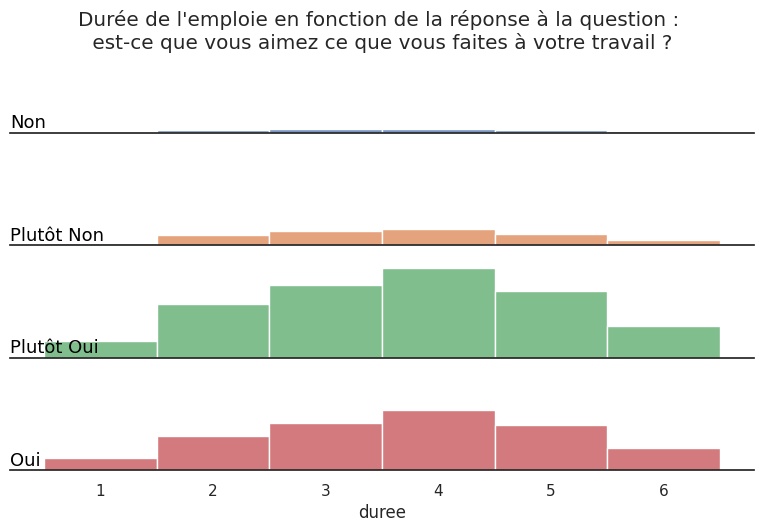

In [ ]:
#mettre graph transparent pour pouvoir les supperposer
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(df, row="q61", hue= "q61", aspect=6, height=1.3)
#enlever les titres et les barres verticales individuelles
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

g.map(sns.histplot, "duree", clip_on=False, discrete = True)
#création d'un dictionnaire pour remplacer les réponse numérique en réponse textuelle
dict_rep = {
  "100": "Oui",
  "33": "Plutôt Oui",
  "-33": "Plutôt Non",
  "-100": "Non",
}

#création du label pour nommer les axes et utilisation du dictionnaire
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, dict_rep[label], color='black', fontsize=13,
            ha="left", va="top", transform=ax.transAxes)

g.map(label, "duree")
#titre du graph
plt.suptitle("""Durée de l'emploie en fonction de la réponse à la question : \n est-ce que vous aimez ce que vous faites à votre travail ? """,y=1.02)
plt.show()

on voit que les données ne semblent pas être distribué très différement, mais on remarque que les gens qui répondent Non sont des emplolyés moins anciens.

On ne remarque pas de paradoxe de Simpson dans ce graph car les distributions ensemble donnerait la presque la meme distribution que chacun des distribution individuelles. La tendance semble se conserver

Maintenant pour la question 62

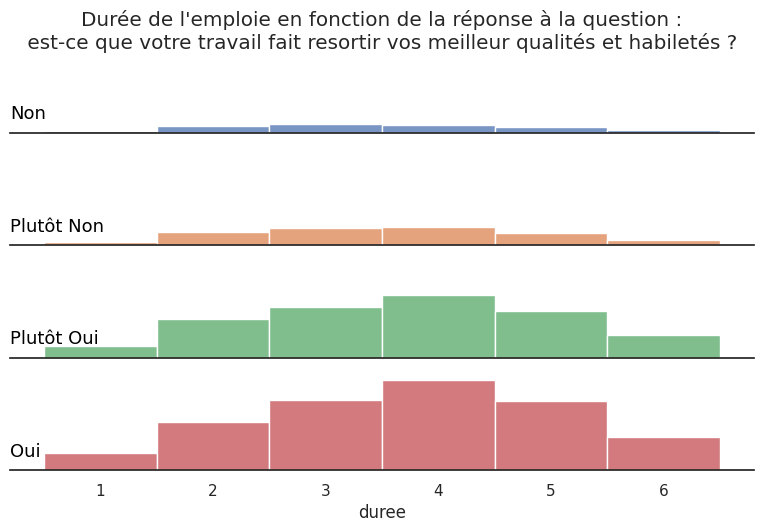

In [ ]:
#mettre graph transparent pour pouvoir les supperposer
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(df, row="q62", hue= "q62", aspect=6, height=1.3)
#enlever les titres et les barres verticales individuelles
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

g.map(sns.histplot, "duree", clip_on=False ,discrete = True)
#création d'un dictionnaire pour remplacer les réponse numérique en réponse textuelle
dict_rep = {
  "100": "Oui",
  "33": "Plutôt Oui",
  "-33": "Plutôt Non",
  "-100": "Non"
}

#création du label pour nommer les axes et utilisation du dictionnaire
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, dict_rep[label], color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "duree")
#titre du graph
plt.suptitle("""Durée de l'emploie en fonction de la réponse à la question :\n est-ce que votre travail fait resortir vos meilleur qualités et habiletés ? """,y=1.02)
plt.show()

on voit que les données ne semblent pas être distribué très différement, mais on remarque que les gens qui répondent Non ou plutot non sont des emplolyés moins anciens que ceux qui répondent oui ou plutot oui en moyenne.

On ne remarque pas de paradoxe de Simpson dans ce graph car les distributions ensemble donnerait la presque la meme distribution que chacun des distribution individuelles. La tendance semble se conserver.

Avec le ridgeline plot, on peut facilement observer des distributions et les comparées avec leur formes générales. par contre il est plus difficiles de comparées leur hauteur respective.

## Displot

<ipython-input-15-aa7ee587e6fd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df,palette = "viridis",alpha = .8, x="duree", element = "poly", legend = False,stat = "probability", discrete = True)


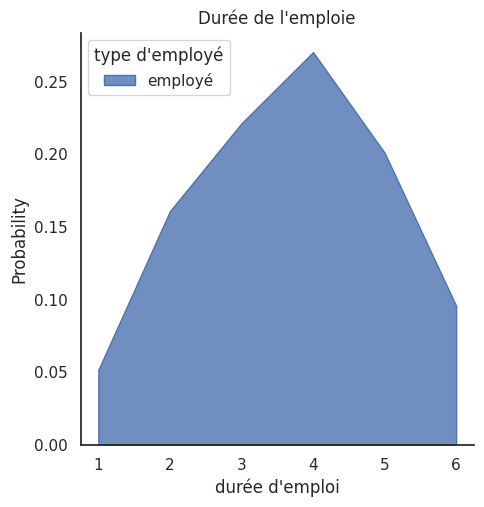

In [ ]:
#création d'un graph displot montrant la distribution des Durée de l'emploie
sns.displot(df,palette = "viridis",alpha = .8, x="duree", element = "poly", legend = False,stat = "probability", discrete = True)
plt.legend(title="type d'employé",loc = "upper left", facecolor = "white", labels=["employé","directeur","superviseur"])
plt.xlabel("durée d'emploi")
plt.title("Durée de l'emploie")
plt.show()


On voit la distribution des employé selon leur durée d'emploie cela ressemble à une gaussienne ce qui est logique dans le contexte

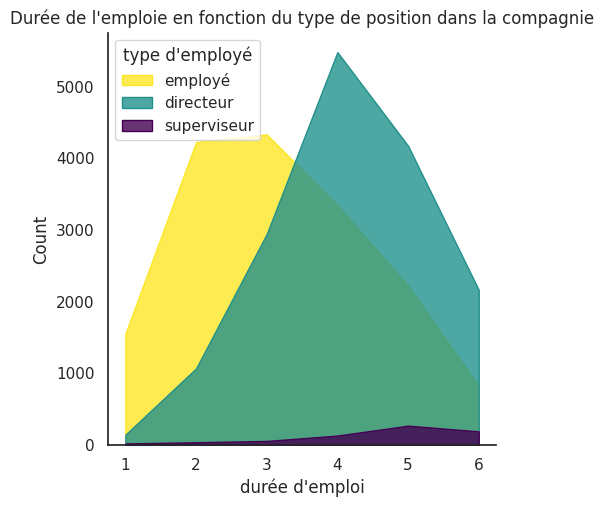

In [ ]:
#création d'un graph displot montrant la Durée de l'emploie en fonction du type de position dans la compagnie
sns.displot(df,palette = "viridis",alpha = .8, x="duree",hue = "q68", element = "poly", legend = False, discrete = True)
plt.legend(title="type d'employé",loc = "upper left", facecolor = "white", labels=["employé","directeur","superviseur"])
plt.xlabel("durée d'emploi")
plt.title("Durée de l'emploie en fonction du type de position dans la compagnie")
plt.show()

On voit un un changement dans les tendances en fonction du type d'employé, mais pas assez pour être un paradoxe de simpson. On remarque que les employées plus anciens ont généralement des emploies plus importants, ce qui est attendu.

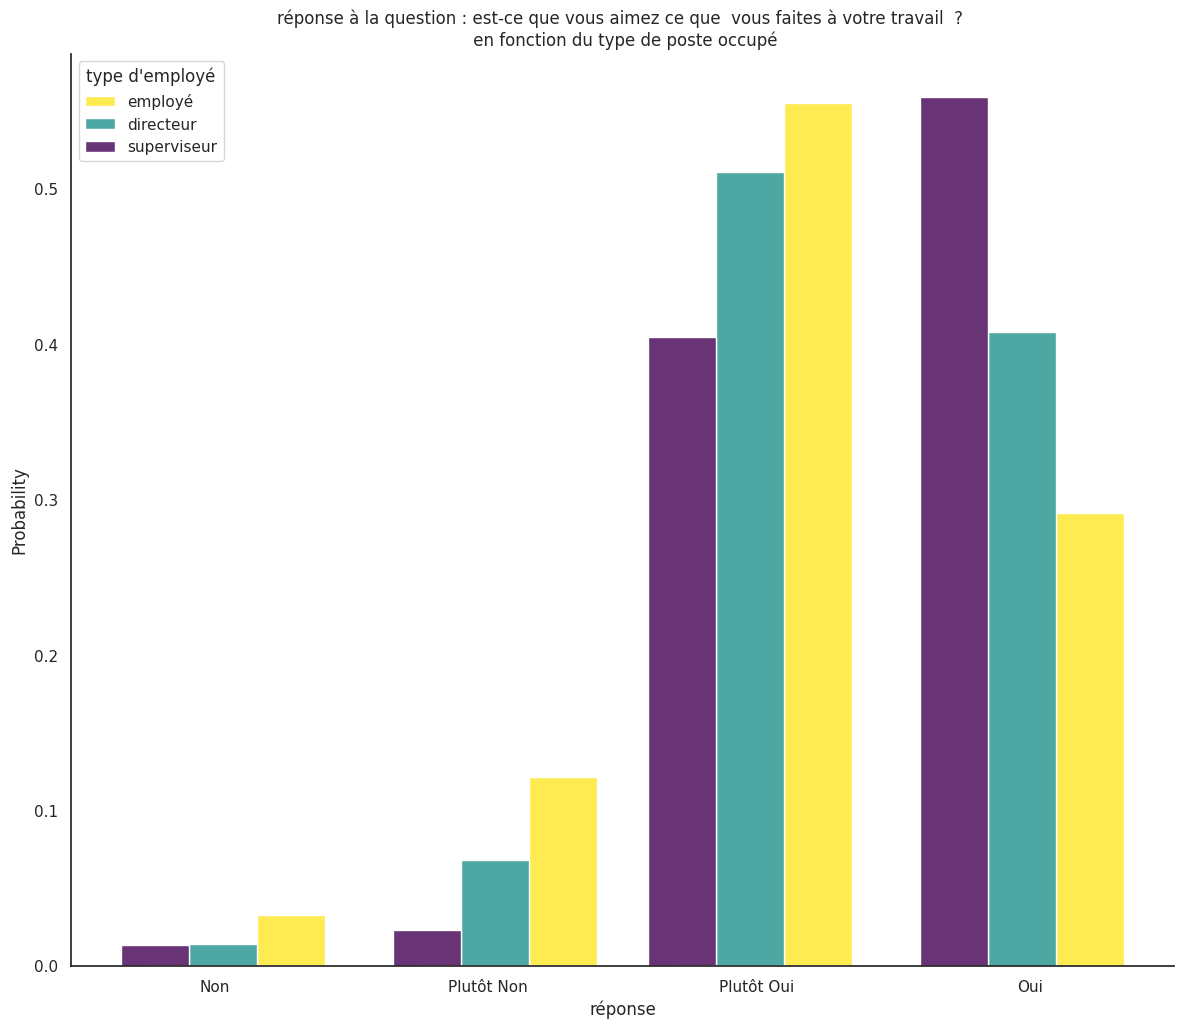

In [ ]:
#création d'un graph displot montrant la réponse à la question :est-ce que votre travail fait resortir vos meilleur qualités et habiletés ? en fonction du type de position dans la compagnie
sns.displot(df, x="q61",palette = "viridis",alpha = .8,multiple = "dodge",hue = "q68",stat = "probability"  ,legend = False,shrink =12, common_norm=False, aspect=1.2, height=10)
plt.xticks([-100,-33,33,100],['Non','Plutôt Non','Plutôt Oui','Oui'])
plt.legend(title="type d'employé",loc = "upper left", facecolor = "white", labels=["employé","directeur","superviseur"])
plt.xlabel("réponse")
plt.title("réponse à la question : est-ce que vous aimez ce que  vous faites à votre travail  ? \n en fonction du type de poste occupé")
plt.show()

là encore, les réponses changent par rapport aux différents types d'emploies mais les distributions semblent les mêmes et la réponse plutot Oui est majoritairemetn préféré. Les supperviseur semble selon ce graph plus apprécié leur travail. On ne voit aucun paradox de simpson dans ce graph car sans la variable Hue qui différencie les différents types d'emploie on obtien la meme tendance

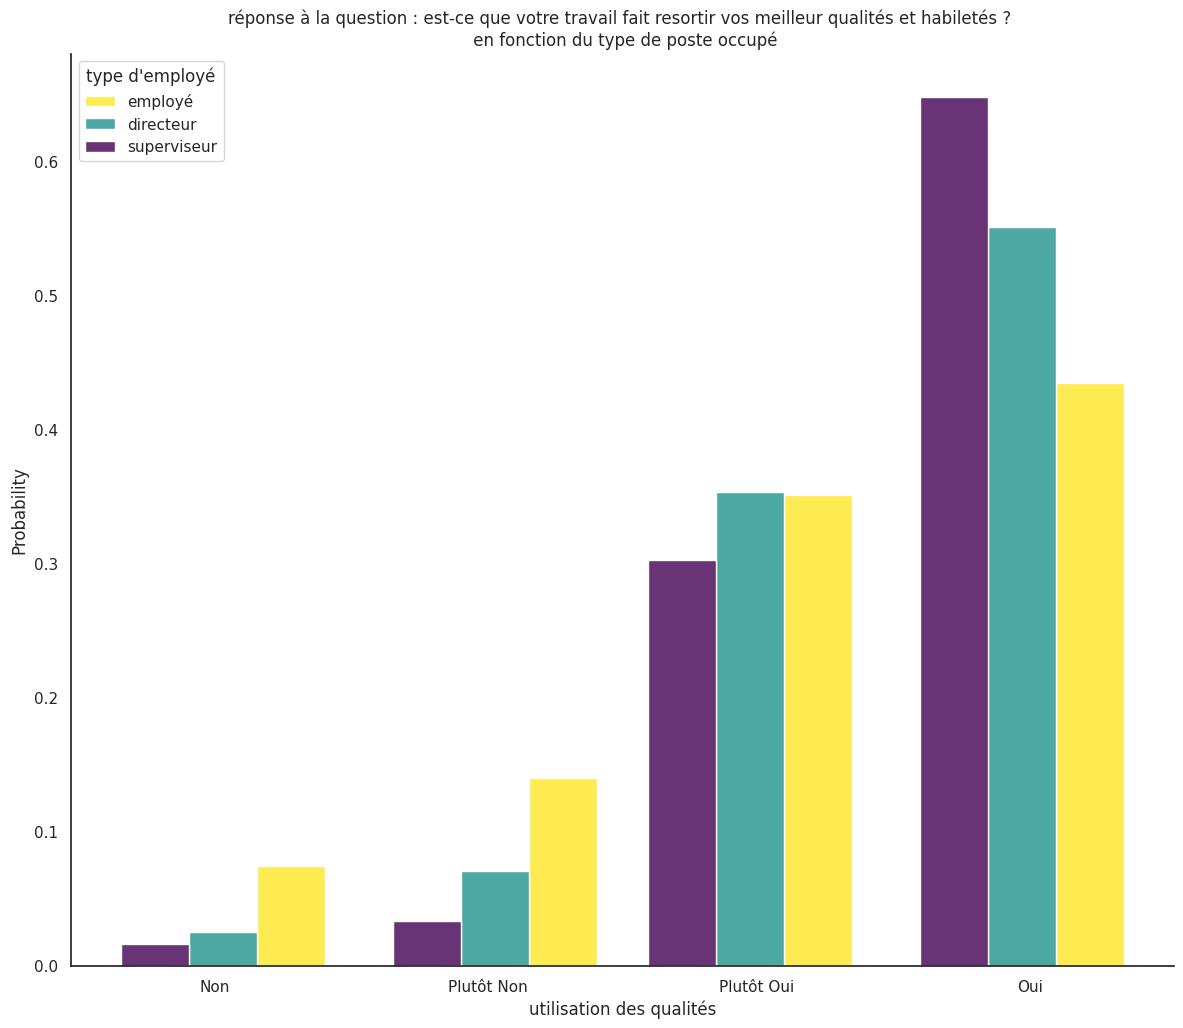

In [ ]:
#création d'un graph displot montrant la réponse à la question :est-ce que votre travail fait resortir vos meilleur qualités et habiletés ? en fonction du type de position dans la compagnie
sns.displot(df, x="q62",palette = "viridis",alpha = .8,multiple = "dodge",hue = "q68",stat = "probability"  ,legend = False,shrink =12, common_norm=False, aspect=1.2, height=10)
plt.xticks([-100,-33,33,100],['Non','Plutôt Non','Plutôt Oui','Oui'])
plt.legend(title="type d'employé",loc = "upper left", facecolor = "white", labels=["employé","directeur","superviseur"])
plt.xlabel("utilisation des qualités")
plt.title("réponse à la question : est-ce que votre travail fait resortir vos meilleur qualités et habiletés ? \n en fonction du type de poste occupé")
plt.show()

les réponses changent par rapport aux différents types d'emploies mais les distributions reste les mêmes et la réponse  Oui est préféré. On ne voit aucun paradox de simpson dans ce graph car sans la variable Hue qui différencie les différents types d'emploie on obtient la même tendance

Les Displots permettent d'afficher dans un même graph plusieurs variable en se servant de la couleur comme autre variable. on peut bien observer les différence de hauteur, mais les distributions horizontales peuvent êtres plus embêtantes à voire.

## Plot ECDF

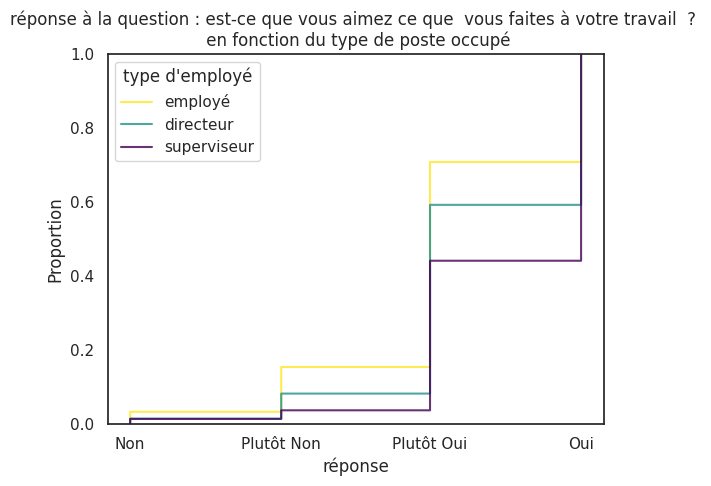

In [ ]:
#création d'un graph ecdf  pour voir la réponse à la question 61 des employées par rapport à leur type d'emploie
sns.ecdfplot(df, x="q61",hue="q68",palette = "viridis",alpha = .8,legend = False)
plt.xticks([-100,-33,33,100],['Non','Plutôt Non','Plutôt Oui','Oui'])
plt.legend(title="type d'employé",loc = "upper left", facecolor = "white", labels=["employé","directeur","superviseur"])
plt.xlabel("réponse")
plt.title("réponse à la question : est-ce que vous aimez ce que  vous faites à votre travail  ? \n en fonction du type de poste occupé")
plt.show()

on remarque que les employés aiment moins leur travail, suivit des directeurs puit des superviseurs. environ 15% des employés n'aiment pas leur travail, 10% des directeurs et 5% des superviseurs. Encore une fois, ce graph ne montre aucun signe d'un paradoxe de Simpson.

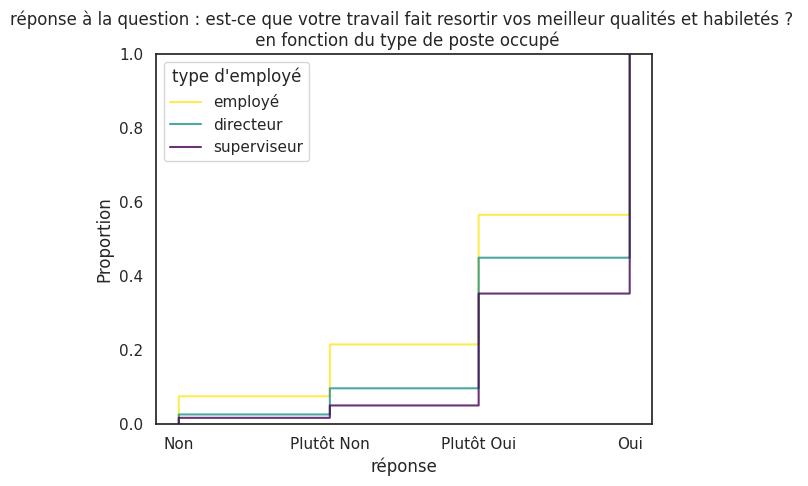

In [ ]:
#création d'un graph ecdf  pour voir la réponse à la question 62 des employées par rapport à leur type d'emploie
sns.ecdfplot(df, x="q62",hue="q68",palette = "viridis",alpha = .8,legend = False)
plt.xticks([-100,-33,33,100],['Non','Plutôt Non','Plutôt Oui','Oui'])
plt.legend(title="type d'employé",loc = "upper left", facecolor = "white", labels=["employé","directeur","superviseur"])
plt.xlabel("réponse")
plt.title("réponse à la question : est-ce que votre travail fait resortir vos meilleur qualités et habiletés ? \n en fonction du type de poste occupé")
plt.show()

on remarque que les employés semblent plus trouvé que leur travail n'utilise pas toutes leur compétences , suivit des directeurs puit des superviseurs. environ + de 20% des employés ont ce sentiment, 10% des directeurs et 5% des superviseurs. Encore une fois, ce graph ne montre aucun signe d'un paradoxe de Simpson.

L'ECDF plot permet de voir facilement des statistiques comme le nombre de personne satisfaite de leur emploie. on peu aussi voire qu'elle option est la plus populaire, mais les courbes peuvent se supperposer.

## Heat map

In [ ]:
#faisont ressortir les colonnes qui pourrait afficher des corélations intéressantes (ont enlève les colonnes avec seulement 2 choix )
cols = ['q61', 'q62', 'q68', 'duree', 'q70','q71','q72']
#standardisation des données
scaler = StandardScaler()
X_std = scaler.fit_transform(df[cols].values)

#création d'une matrice de covariance entre ces colonnes
cov_mat =np.cov(X_std.T)


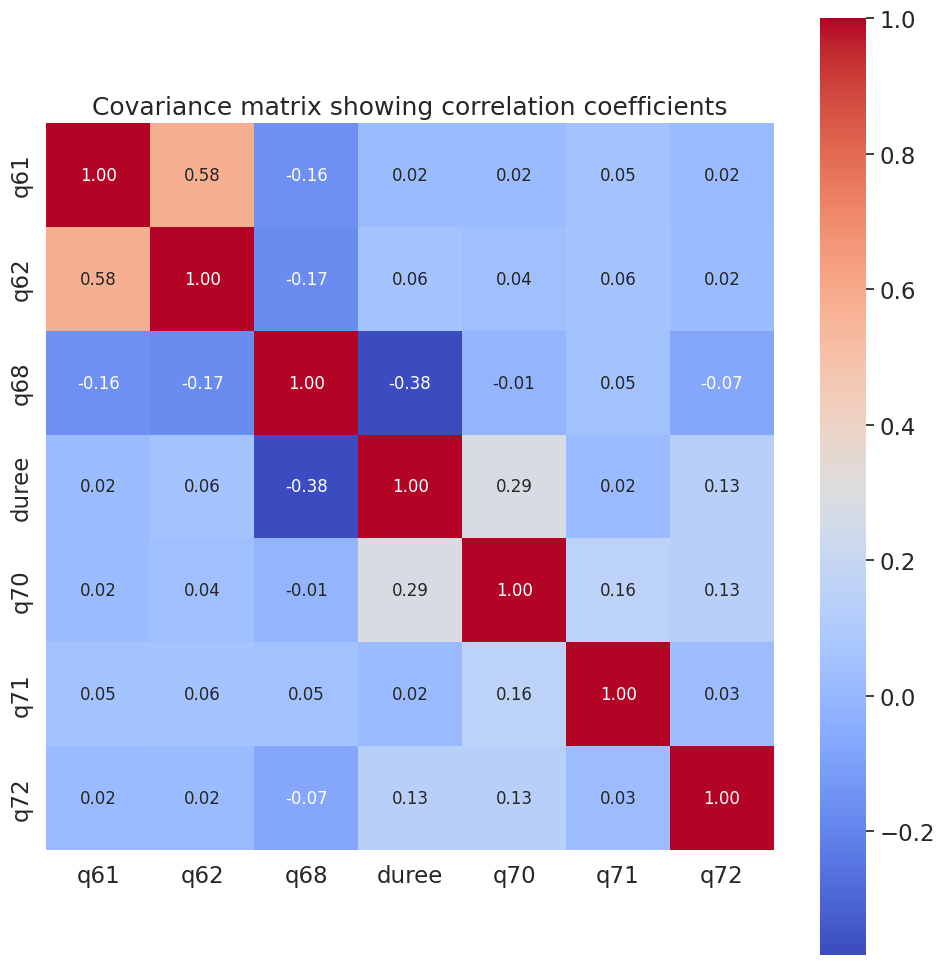

In [ ]:
#création d'une heatmap avec la matrice de covariance
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',
                 yticklabels=cols,
                 xticklabels=cols)

plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

On observe ici un corélation entre la question 61 et 62, celle qui porte sur si un employé aime ce qu'il fait au travail et si il sens que ces compétences sont bien utilisé. Il est donc logique qu'il y ait une certaine corrélation.

Ensuite la question 68 semble négativement corrélé avec la question 61 et 62 faiblement et un peu plus fortement avec la durée d'emploi. Cela s'explique par le fait que la question 68 est celle sur le type d'emploie et les réponses se disposent comme suit : (1:supperviseur, 2:directeur, 3 :employé). NOus avons déjà vu comment cette quesiton était lié aux 3 autres dans les précédents graphique.

Aucun paradox de Simpson ne semble présent ici.

la heatmap est parfaite pour représenter les corrélations entre plusieurs variables, mais dans notre cas ne nous en apprend pas beaucoup plus que ce que nous savions déjà. Pour nos données catégorielle à 2 valeurs elle n'est pas particulièrement bien adaptée


## ClusterMap

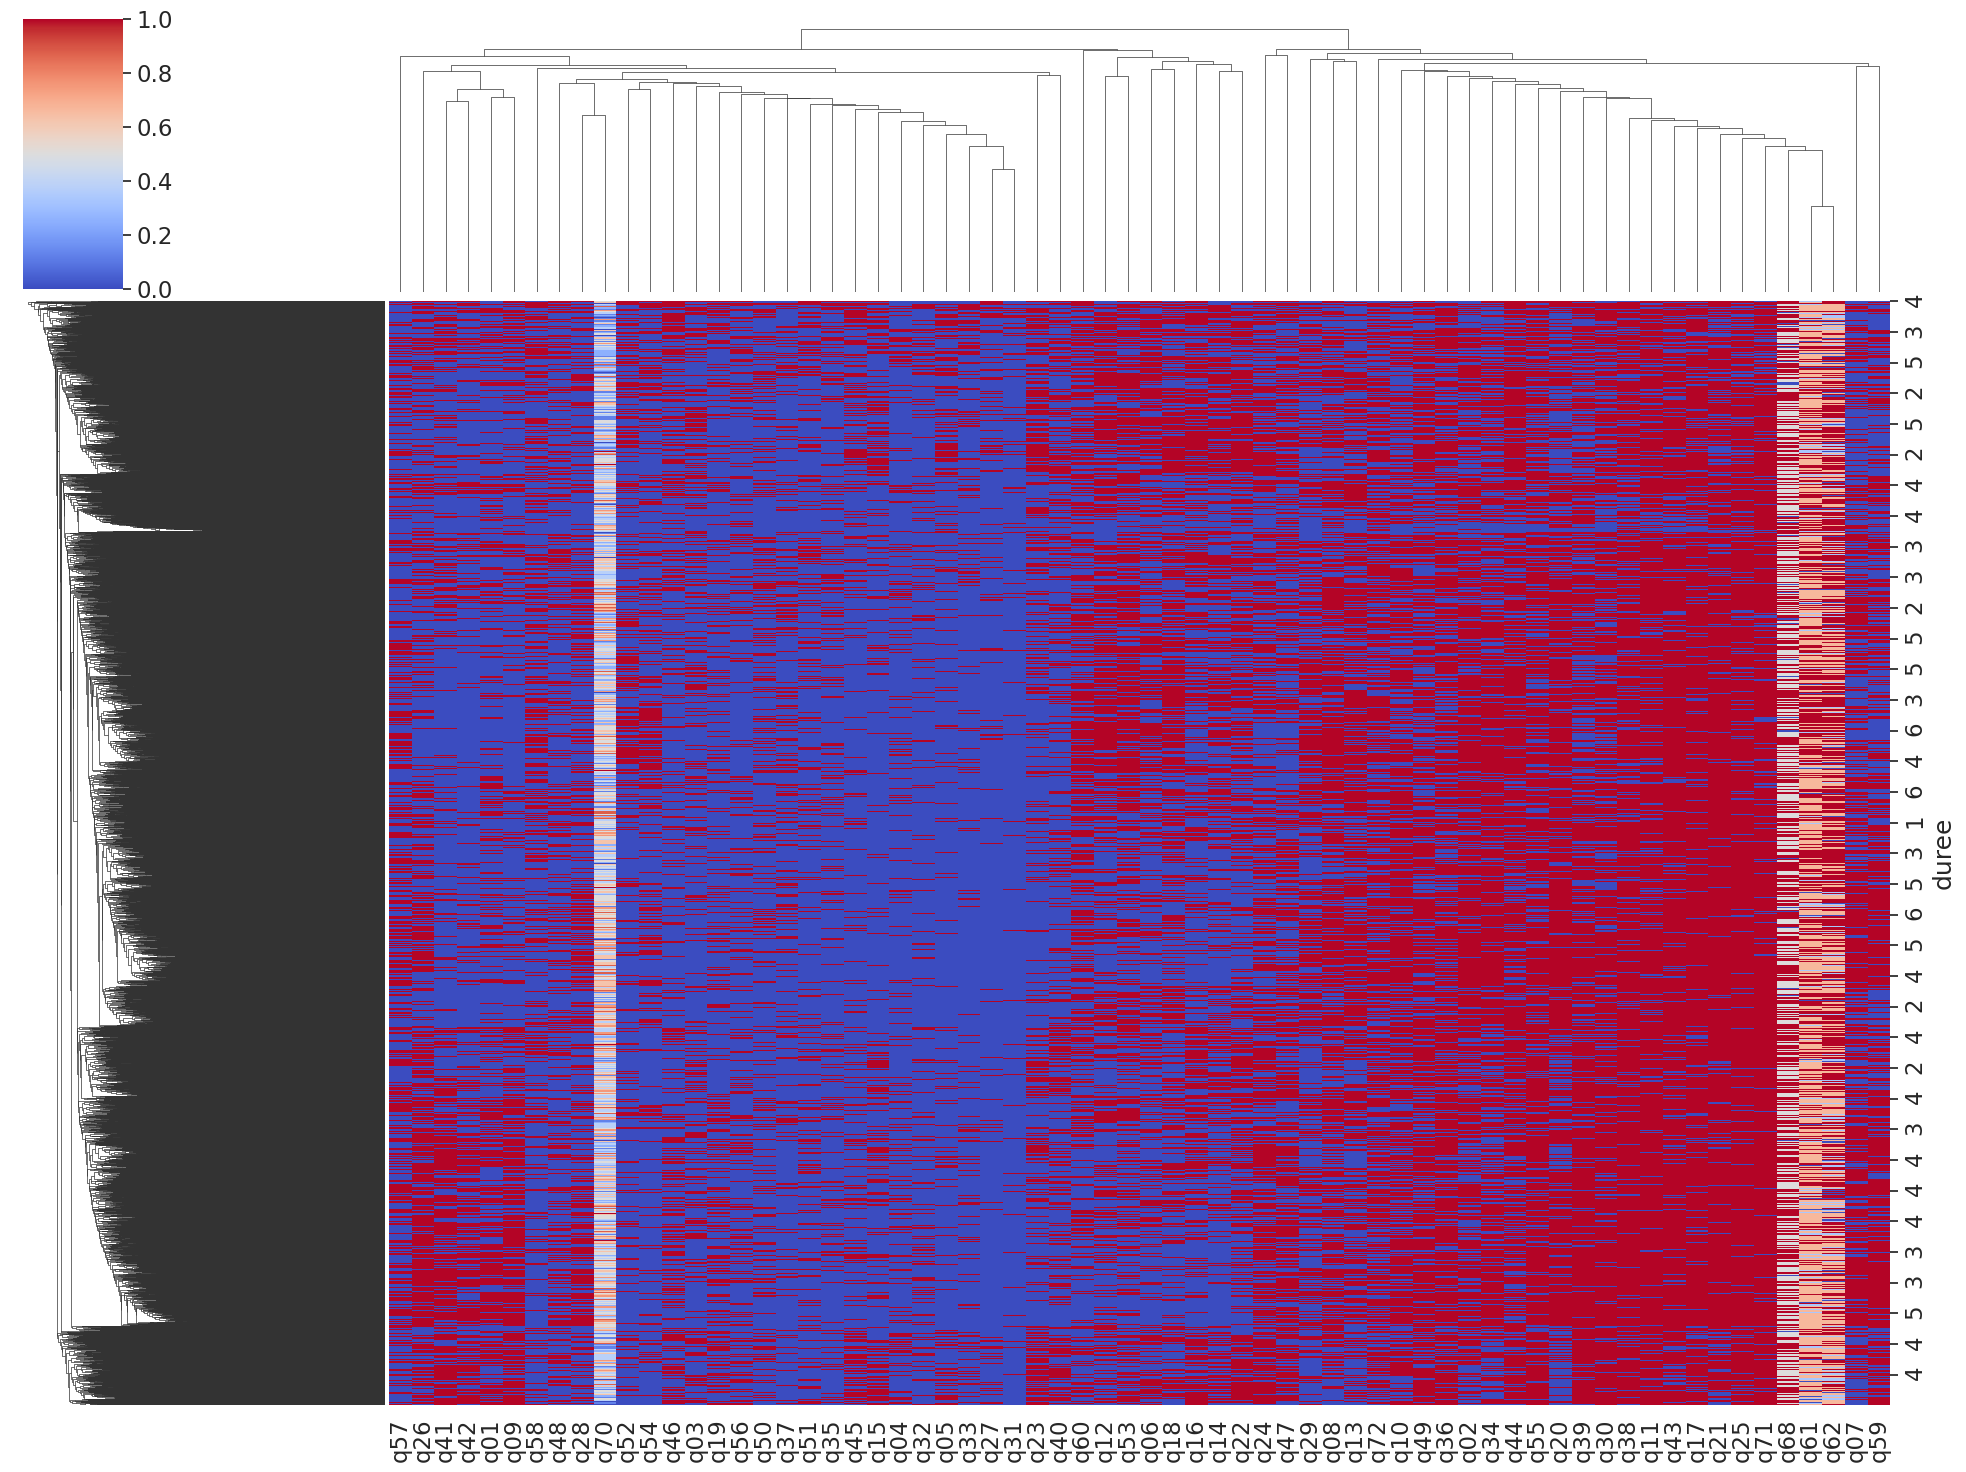

In [23]:
#creation d'un cluster map avec toute les colonne et comme indexe la colonne duree de l'emploie

data = df_choix_unique

data = data.set_index("duree")


sns.clustermap(data,standard_scale =1, cmap='coolwarm',  xticklabels=True, figsize=(20, 15)); # cmap= color map

Cette figue ne nous renseigne pas beaucoup. Clustermap semble incapable de trouver des clusters distints des autres.

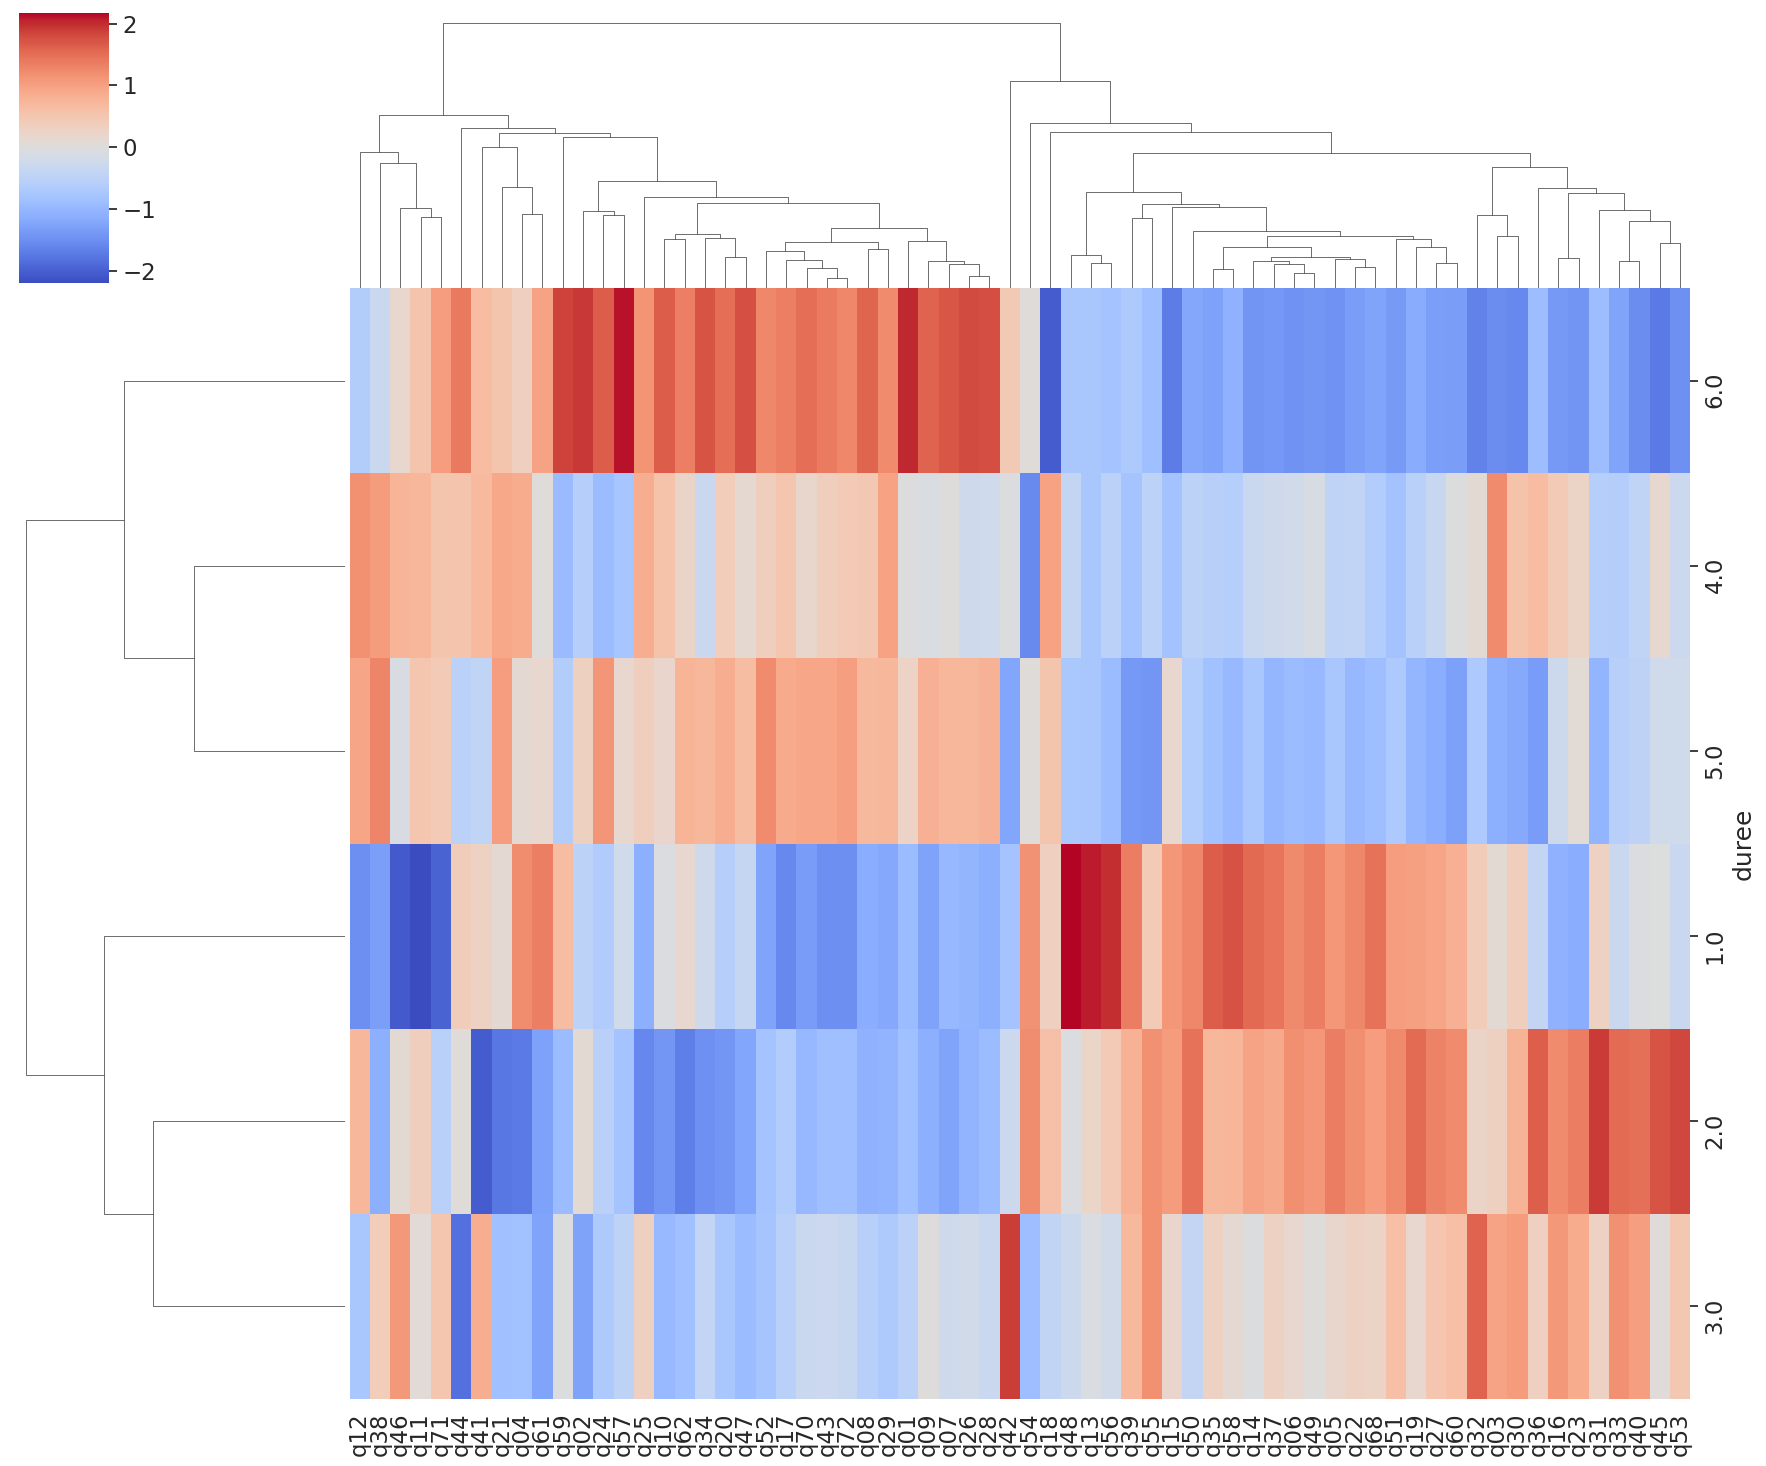

In [24]:
#on prend un nouveau dataframe vide avec les dimension en colonne de l'eancien mais seulement 6 rangées
data_1 = pd.DataFrame(index=np.arange(6), columns=df_choix_unique.columns)


#pour chaque rangée on rempli les valeur de chaque question avec la moyenne des réponses des personnes de la meme catégories de durée d'emploie
#chaque rangée devient donc la moyenne de tout les répondant avec la même durée d'emploie
for i in range(1,7):

  data_duree = df_choix_unique.iloc[:,1:].where(df_choix_unique["duree"] == i)

  data_1.iloc[i-1,1:] = data_duree.mean()
  #met dans la colonne duree la duree d'emploide ce groupe
  data_1.iloc[i-1,0] = i
#reconverti le dataframe en valeur numérique
data_1 = data_1.astype(np.float64)

#standardisation des données sur toutes les données sauf la colonne durée

scaler = StandardScaler()
data_1.iloc[:,1:] = scaler.fit_transform(data_1.iloc[:,1:])

#place la colonne duree comme index
data_1 = data_1.set_index("duree")

#creation du cluster map
sns.clustermap(data_1, cmap='coolwarm',  xticklabels=True, figsize=(18, 15)); # cmap= color map

On peut voir dans ce cluster map que certaine réponse semble être favorisé pour différente catégorie de durée d'emploie.

puisque nos question ont des réponses fixes, pLus une case est rouge plus la réponses est en générales plus élevé. Et une bleu une réponses plus faible.

Les réponses sont souvent (1 ou 2 )

Par exemple les question 59,2,57 et 1 semble être très corrélé à un employés qui est là depuis longtemps.

la question 1 est par exemple :
1- habituellement vous êtes : (1: communicatif,2: assez retenus et calme)


on voit donc qu'un employé de plus de 10 ans (catégorie 6) répond majoritairement assez retenu et calme.

il répond aussi majoritairement calm à la question 18 (quel mot dans la pair calm ou animé aimé vous le plus dans sa signification).

Nous pouvont donc effectivement trouvé des tendances comportementales lié aux temps d'emploiements avec ce cluster map.

Par contre, il ne semple pas présenter de paradoxe de simpson


## PCA

In [25]:

#séparation du dataframe avec seulement des choix unique (pas de type objet) en deux pour avoir un set de réponse et un set de training
X = df_choix_unique.iloc[:,1:]
y = df_choix_unique.iloc[:,0]


#standardisation des données
X_std = StandardScaler().fit_transform(X)

#application de PCA avec autant de dimension que les données originales pour voir la varaince de données par rapport aux dimension trouvées
sklearn_pca = sklearnPCA(n_components = X.shape[1])
trainedModel = sklearn_pca.fit(X_std)

print(trainedModel.explained_variance_ratio_*100)



[5.9249707  5.81313235 3.642917   2.90307438 2.43080403 2.33483574
 2.07663557 2.05798499 1.91123248 1.83005001 1.72591808 1.6694326
 1.58369083 1.57324946 1.55966385 1.48603805 1.47800279 1.45578322
 1.44841845 1.43663531 1.41168292 1.39882585 1.38935959 1.38870082
 1.37508865 1.36566128 1.33470384 1.33074077 1.31460114 1.30397642
 1.29363332 1.28228313 1.27241328 1.26708589 1.25710553 1.25059921
 1.24566414 1.2373321  1.22960627 1.22023294 1.21313243 1.20145617
 1.18583915 1.1793732  1.1667128  1.16222491 1.15492052 1.14187081
 1.13866336 1.13066611 1.10721914 1.09707818 1.08017957 1.07733011
 1.07092902 1.056918   1.05007484 1.0324543  1.02027886 1.00992247
 0.99359256 0.94862226 0.91107199 0.88027377 0.85370765 0.62372087]


On voit que PCA ne donnera pas de très bon résultats puisque les 2 premières dimension ne capture que 12% de la variance des données

Text(0, 0.5, 'Principal Component 2')

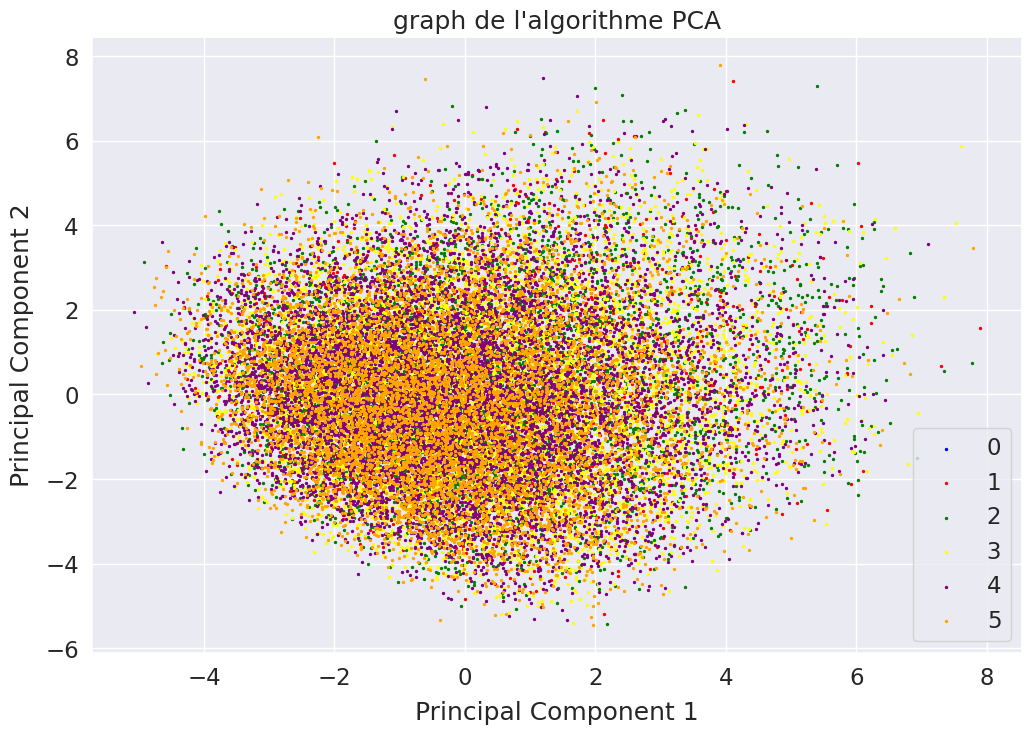

In [26]:

#initialisation de PCA avec 2 dimensions
sklearn_pca = sklearnPCA(n_components = 2)
trainedModel = sklearn_pca.fit(X_std)

#calcul des valeurs en 2d avec PCA
Y_PCA = trainedModel.transform(X_std)


#création d'un graphe pour voir la rprésentation des données en 2d avec un codede couleur représentant les valeurs de durée d'emploie attendues
fig = plt.figure(figsize =(12,8))
ax = plt.axes()


for lab, col in zip((0, 1, 2,3,4,5),
                        ('blue', 'red', 'green',"yellow","purple","orange")):
  sctt = ax.scatter(Y_PCA[lab == y,0],Y_PCA[lab == y,1], c= col, label= lab,s =2)


plt.title("graph de l'algorithme PCA")

plt.legend(loc='lower right')
ax.set_xlabel('Principal Component 1',labelpad = 8)
ax.set_ylabel('Principal Component 2',labelpad = 8)


PCA a bel et bien réussis à ramener les points en 2 dimension, par contre on ne peut discerner de cluster évident et les points de différent type de durée d'emploie sont tous mélangé. Donc même en appliquant un algorithme de clustering on arivera pas a retrouvé les résultats attendus.

L'algorithme de PCA utilisant la variance, des données catégorielles ne sont vraiment pas ce qu'il attend à recevoir. Le résultat est assez inutilisable pour notre problème, mais au moins l'algorithme fonctionne assez rapidement et on peu voir combien de variance on garde.

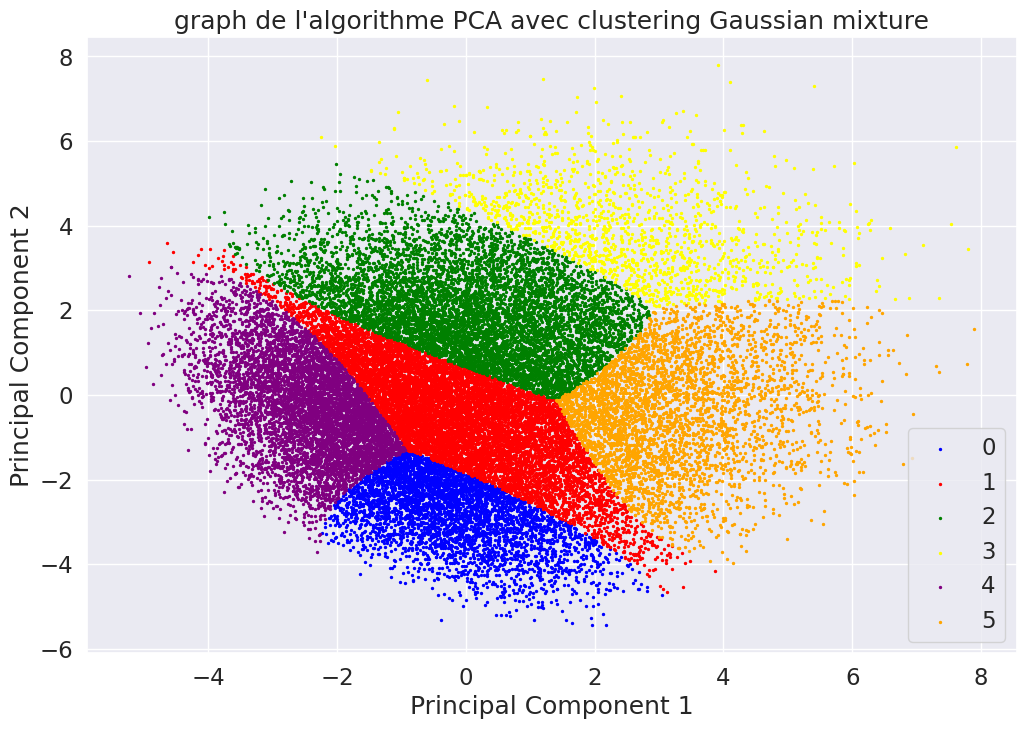

In [27]:

# initialisation de l'agorithme de clustering gaussian mixture avec 6 cluster , méthode d'initialisation k-mean++ et tolérance de 1e-6, 3 itération pour trouver un le meilleur résultat possible
gmm = GaussianMixture(n_components=6,init_params='k-means++',max_iter=1000, n_init = 3,
                            tol=1e-6)
gmm.fit(Y_PCA)
#prédiction du modèle
labels_PCA_6 = gmm.predict(Y_PCA)



#création d'un graphique
fig = plt.figure(figsize =(12,8))
ax = plt.axes()

#création de label et de couleur associer
for lab, col in zip((0, 1, 2,3,4,5),
                        ('blue', 'red', 'green',"yellow","purple","orange")):

  ax.scatter(Y_PCA[labels_PCA_6==lab, 0],Y_PCA[labels_PCA_6==lab, 1], label=lab,c=col,s =2)

#paramètre graph
plt.title("graph de l'algorithme PCA avec clustering Gaussian mixture")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.show()


L'agorithme de clustering à réussis à séparer les données en 6 cluster, mais puisque les points sont tous mélangés le clustering ne veux rien dire.

## t-SNE

In [ ]:





#initialisation de TSNE avec 2 dimensions
sklearn_TSNE = TSNE(n_components = 2)
#calcul des valeurs en 2d avec TSNE
Y_TSNE = sklearn_TSNE.fit_transform(X_std)



#création d'un graphe pour voir la rprésentation des données en 2d avec un codede couleur représentant les valeurs de durée d'emploie attendues
fig = plt.figure(figsize =(12,8))
ax = plt.axes()


for lab, col in zip((0, 1, 2,3,4,5),
                        ('blue', 'red', 'green',"yellow","purple","orange")):
  sctt = ax.scatter(Y_TSNE[lab == y,0],Y_TSNE[lab == y,1], c= col, label= lab,s =2)


plt.title("graph de l'algorithme T-SNE")

plt.legend(loc='lower right')
ax.set_xlabel('Principal Component 1',labelpad = 8)
ax.set_ylabel('Principal Component 2',labelpad = 8)


L'algorithme à bien réduit les points en 2 dimensions et à réussis à créer des zones plus ou moins bien séparer. Le clustering n'est pas parfait, mais au moins on voit des zones plus et moins dense. On a cependant des données assez mélangés, mais peut-être qu'un autre qualificatif pourrati expliqué c'est mini-clusters. L'algorithme est très lent comparé au autre.

In [ ]:


# initialisation de l'agorithme de clustering gaussian mixture avec 6 cluster , méthode d'initialisation k-mean++ et tolérance de 1e-6, 3 itération pour trouver un le meilleur résultat possible
gmm = GaussianMixture(n_components=6,init_params='k-means++',max_iter=1000, n_init = 3,
                            tol=1e-6)

#prédiction du modèle
gmm.fit(Y_TSNE)
labels_TSNE_6 = gmm.predict(Y_TSNE)


#création d'un graphique
fig = plt.figure(figsize =(12,8))
ax = plt.axes()

#création de label et de couleur associer
for lab, col in zip((0, 1, 2,3,4,5),
                        ('blue', 'red', 'green',"yellow","purple","orange")):

  ax.scatter(Y_TSNE[labels_TSNE_6==lab, 0],Y_TSNE[labels_TSNE_6==lab, 1], label=lab,c=col,s =2)
#paramètre graph
plt.title("graph de l'algorithme T-SNE avec le clustering gaussian mixture")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.show()


L'agorithme de clustering à réussis à séparer les données en 6 cluster, mais puisque les points sont tous mélangés le clustering ne veux rien dire. Il identifie tout de meme les minis clusters avec une certaine éfficacité


## Umap

In [ ]:


#initialisation de Umap avec 2 dimensions
UMAP = umap.UMAP()

#calcul des valeurs en 2d avec Umap
Y_UMAP = UMAP.fit_transform(X_std)



#création d'un graphe pour voir la rprésentation des données en 2d avec un codede couleur représentant les valeurs de durée d'emploie attendues

fig = plt.figure(figsize =(12,8))
ax = plt.axes()


for lab, col in zip((0, 1, 2,3,4,5),
                        ('blue', 'red', 'green',"yellow","purple","orange")):
  sctt = ax.scatter(Y_UMAP[lab == y,0],Y_UMAP[lab == y,1], c= col, label= lab,s =2)


plt.title("graph de l'algorithme Umap")

plt.legend(loc='lower right')
ax.set_xlabel('Principal Component 1',labelpad = 8)
ax.set_ylabel('Principal Component 2',labelpad = 8)

Comme pour PCA et TSNE, Umap à réussi à ramené les données en 2d. Il a aussi formé des clusters assez évidents. Il est assez rapide, est très constant et donne de très bon résultat, les meilleurs d'entre les 3 clustering.

 Les 2 clusters sont peut-être les memes catégories que TSNE semblait identifié.

In [ ]:
# initialisation de l'agorithme de clustering gaussian mixture avec 6 cluster , méthode d'initialisation k-mean++ et tolérance de 1e-6, 3 itération pour trouver un le meilleur résultat possible
gmm = GaussianMixture(n_components=6,init_params='k-means++',max_iter=1000, n_init = 3,
                            tol=1e-6)

#prédiction du modèle
gmm.fit(Y_UMAP)
labels_UMAP_6 = gmm.predict(Y_UMAP)



#création d'un graphique
fig = plt.figure(figsize =(12,8))
ax = plt.axes()

#création de label et de couleur associer
for lab, col in zip((0, 1, 2,3,4,5),
                        ('blue', 'red', 'green',"yellow","purple","orange")):

  ax.scatter(Y_UMAP[labels_UMAP_6==lab, 0],Y_UMAP[labels_UMAP_6==lab, 1], label=lab,c=col,s =2)
#paramètre graph
plt.title("graph de l'algorithme UMAP avec le clustering gaussianMixture")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')

plt.show()

L'algorithme de clustering à réussis à séparer les données en 6 cluster, mais puisque les points sont tous mélangés le clustering ne veux rien dire.

Il a par contre compris que deux petits cluster était séparer des autres et les a correctement identifié.

## Tableau score + calcul score clustering

calcul d'un clustering appliqué aux données originales

In [ ]:


gmm = GaussianMixture(n_components=6)
gmm.fit(X_std)
labels_donnee_6 = gmm.predict(X_std)

In [ ]:
#calul des performances avec silhouette et NMI

silhouette_Donnee_6 = SILHOUETTE(X_std, labels_donnee_6)
NMI_Donnee_6= MRI(labels_donnee_6,y)



silhouette_PCA_6 = SILHOUETTE(Y_PCA, labels_PCA_6)
NMI_PCA_6 = MRI(labels_PCA_6,y)




silhouette_TSNE_6 = SILHOUETTE(Y_TSNE, labels_TSNE_6)
NMI_TSNE_6 = MRI(labels_TSNE_6,y)



silhouette_UMAP_6 = SILHOUETTE(Y_UMAP, labels_UMAP_6 )
NMI_UMAP_6  = MRI(labels_UMAP_6 ,y)




In [ ]:

t = PrettyTable(['Algorithme + clustering avec 6 cluster', 'Score Silhouette', 'Score NMI'])

t.add_row(['Aucun algorithme + Gaussian Misture clustering', "{:.04f}".format(silhouette_Donnee_6), "{:.04f}".format(NMI_Donnee_6)])
t.add_row(['PCA + Gaussian Misture clustering', "{:.04f}".format(silhouette_PCA_6),"{:.04f}".format( NMI_PCA_6)])
t.add_row(['TSNE + Gaussian Misture clustering', "{:.04f}".format(silhouette_TSNE_6),"{:.04f}".format( NMI_TSNE_6)])
t.add_row(['UMAP + Gaussian Misture clustering', "{:.04f}".format(silhouette_UMAP_6), "{:.04f}".format(NMI_UMAP_6)])


print(t)

On remarque le score de silhouette augmente avec PCA, encore plus avec TSNE et encore plus avec UMAP.C'est normal car silhouette se fie sur l'étalement des clusters et la distance entre eux. donc PCA qui avait un grand cluster a un score faible, TSNE avit ses mini-cluster un score un peu plus élevé et UMAP le score le plus grand.

Pour NMI les 4 on des score très faible car les labels des données originaux ne se faisait jamais regrouper entre eux, donc aucune chance de créer des clusters représentant bien les labels originals. (ce que NMI mesure)

In [ ]:
#testons NMI entre TSNE et UMAp pour voir si les mini cluster de UMAP et TSNE représentait les mêmes valeurs.

NMI_TSNE_UMAP = MRI(labels_TSNE_6,labels_UMAP_6)
print("{:.04f}".format(NMI_TSNE_UMAP))

On voit que UMAP et TSNE avait trouvé des clusters assez semblables entre eux et donc les mini-cluster de TSNE et les cluster de UMAP sont peut-être les mêmes et pourrait faire ressortir une catégorisation qui nous a échappés.